In [1]:
import os
import pandas as pd
import numpy as np
from custom_layers import ConvTypes
from LossManager import LossTypes, LossManager
import scikit_posthocs as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

import pickle 

from framspy.FramsticksLib import *
import subprocess

In [2]:
path_configs = "/home/adam/thesis/VGAE/experiments/experiment_base/models/No/configs/"
path_models = "/home/adam/thesis/VGAE/experiments/experiment_base/models/"

In [3]:
pathframs = "/home/adam/Framsticks/Framsticks50rc19"
FramsManager = FramsManager(pathframs)

framsLib = FramsticksLib(pathframs,None,["/home/adam/thesis/VGAE/framspy/eval-allcriteria.sim"])


Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

Using Framsticks version: 5.0rc19.1
Home (writable) dir     : /home/adam/Framsticks/Framsticks50rc19/data
Resources dir           : /home/adam/Framsticks/Framsticks50rc19/data

Available objects: ['CheckpointEvent', 'Collision', 'CrCollision', 'Creature', 'CreatureSettings', 'CreatureSignals', 'CreatureSnapshot', 'Dictionary', 'ExpProperties', 'ExpState', 'ExtValue', 'File', 'FunctionReference', 'GenMan', 'GenManStats', 'GenePool', 'GenePools', 'Geno', 'Genotype', 'Interface', 'Joint', 'Loader', 'Math', 'MechJoint', 'MechPart', 'MessageCatcher', 'Model', 'ModelGeometry', 'ModelSymmetry', 'Neuro', 'NeuroClass', 'NeuroClassLibrary', 'NeuroDef', 'NeuroSignals', 'NeuronsSimEnabled', 'ODE', 'Orient', 'Part', 'Population', 'Populations', 'Ref', 'Signal', 'SignalView', 'SimilMeasure', 'SimilMeasureDistribution', 'Simil

In [4]:
def get_convType(name):
    if name =="gcnconv":
        return "GCNConv"
    elif name =="armaconv":
        return "ARMAConv"
    elif name =="eccconv":
        return "ECCConv"
    elif name =="gatconv":
        return "GATConv"
    elif name =="gcsconv":
        return "GCSConv"
    
def get_Loss(name):
    if name =="joints":
        return "joints"
    elif name =="parts":
        return "parts"
    elif name =="fitness":
        return "fitness"
    elif name =="dissim":
        return "dissim"
    elif name =="None":
        return "No"

In [5]:
def load_losses(path):
    losses_all_test = []
    losses_all_train = []
    try:
        with open("{0}/losses_test.npy".format(path), "rb") as infile: 
            losses_all_test = np.load(infile).tolist()
        with open("{0}/losses_train.npy".format(path), "rb") as infile: 
            losses_all_train = np.load(infile).tolist()
#         print("Losses loaded successfully")
    except Exception as e:
        print("Error while loading Losses ", e)
    return losses_all_train, losses_all_test

In [6]:

columns = ["name","counter","loss_type","ae_type","convtype","latentdim","nhidden","convenc","denseenc","densedeca","convdecx","densedecx","path_model","losses_all_train", "losses_all_test","loss_train","loss_test"]
all_models= pd.DataFrame(columns=columns )
batchsize = 256
learningrate = 0.01
numfeatures = 3
adjsize = 15
counter = 0
for path, subdirs, files in os.walk(path_configs):
    for file_name in files:
        if "vTrue" in file_name:
            ae_type = "VGAE"
        else:
            ae_type = "GAE"
        splitted = file_name.split("_")
        
        convtype = get_convType(splitted[1])
        latentdim = splitted[2]
        nhidden = splitted[3]
        convenc = splitted[4]
        denseenc = splitted[5]
        densedeca = splitted[6]
        convdecx = splitted[7]
        densedecx = splitted[8]
        loss_type = get_Loss(splitted[9])
        

        for trainid in range(1,11,1):
            path_model = (str(path_models)+
                loss_type+
                "/"+ae_type +
                "/numfeatures"+str(numfeatures) +
                "/adjsize"+str(adjsize) + 
                "/batchsize"+str(batchsize) +
                "/latentdim"+str(latentdim)+
                "/nhidden"+str(nhidden)+
                "/learningrate"+str(learningrate)+
                "/convtype"+str(convtype)+
                "/model_enc_"+str(convenc)+"_"+str(denseenc)+
                 "_deca"+str(densedeca)+
                 "_decx"+str(convdecx)+"_"+str(densedecx)+
                 "_train_id_"+str(trainid)
                )
            
            losses_all_train, losses_all_test = load_losses(path_model)
            loss_train = losses_all_train[-1][1]
            loss_test = losses_all_test[-1][1]
            name =convtype+"_"+convenc # ae_type+"_"+
            data_model = [[name,counter,loss_type,ae_type,convtype,latentdim,nhidden,convenc,denseenc,densedeca,convdecx,densedecx,path_model,losses_all_train, losses_all_test,loss_train,loss_test]]
            data_model = pd.DataFrame(data_model,columns=columns) 
            all_models = all_models.append(data_model, ignore_index=True)
        counter+=1


In [7]:
all_models.shape

(480, 17)

In [8]:
all_models.sort_values(by="loss_test")

,name,counter,loss_type,ae_type,convtype,latentdim,nhidden,convenc,denseenc,densedeca,convdecx,densedecx,path_model,losses_all_train,losses_all_test,loss_train,loss_test
297,GCSConv_2,29,No,GAE,GCSConv,15,64,2,2,1,1,2,/home/adam/thesis/VGAE/experiments/experiment_...,"[[1380.48388671875, 1380.48388671875, 0.613619...","[[1000.0797119140625, 1000.0797119140625, 0.62...",171.777512,252.322357
444,ARMAConv_1,44,No,GAE,ARMAConv,15,64,1,2,1,1,2,/home/adam/thesis/VGAE/experiments/experiment_...,"[[1049.836669921875, 1049.836669921875, 0.6138...","[[1069.4942626953125, 1069.4942626953125, 0.62...",226.042053,279.916046
296,GCSConv_2,29,No,GAE,GCSConv,15,64,2,2,1,1,2,/home/adam/thesis/VGAE/experiments/experiment_...,"[[925.0695190429688, 925.0695190429688, 0.5782...","[[1052.50927734375, 1052.50927734375, 0.617850...",773.255798,283.675385
293,GCSConv_2,29,No,GAE,GCSConv,15,64,2,2,1,1,2,/home/adam/thesis/VGAE/experiments/experiment_...,"[[1307.0068359375, 1307.0068359375, 0.65721321...","[[1072.1378173828125, 1072.1378173828125, 0.64...",263.236298,288.171021
298,GCSConv_2,29,No,GAE,GCSConv,15,64,2,2,1,1,2,/home/adam/thesis/VGAE/experiments/experiment_...,"[[1090.6121826171875, 1090.6121826171875, 0.59...","[[1071.2216796875, 1071.2216796875, 0.60800546...",370.515747,290.744171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,GCNConv_2,26,No,VGAE,GCNConv,3,64,2,2,1,1,2,/home/adam/thesis/VGAE/experiments/experiment_...,"[[1390.7974853515625, 1387.5445556640625, 1.01...","[[1465.2335205078125, 1461.98486328125, 0.8935...",727.788147,1066.405518
187,GCNConv_1,18,No,VGAE,GCNConv,3,64,1,2,1,1,2,/home/adam/thesis/VGAE/experiments/experiment_...,"[[1175.624267578125, 1173.600341796875, 0.9007...","[[1339.8546142578125, 1337.830322265625, 0.872...",1291.015137,1311.290771
64,GATConv_2,6,No,GAE,GATConv,3,64,2,2,1,1,2,/home/adam/thesis/VGAE/experiments/experiment_...,"[[1376.157958984375, 1376.157958984375, 0.8695...","[[1367.0499267578125, 1367.0499267578125, 0.85...",1523.727661,1352.543457
142,GATConv_2,14,No,VGAE,GATConv,3,64,2,2,1,1,2,/home/adam/thesis/VGAE/experiments/experiment_...,"[[1228.580078125, 1226.9461669921875, 0.878592...","[[1400.28515625, 1398.6728515625, 0.8811567425...",1341.097656,1385.172974


In [9]:
def get_models_list_of_losses(all_models):
    current_columns = columns + ['losses_train','losses_test','mean_loss_test','mean_loss_train','std_loss_test','std_loss_train',]
    counters  = set(all_models['counter'])
    finall_df  = pd.DataFrame(columns=current_columns )
    for c in counters:
        counter_models = all_models.loc[all_models['counter']==c]
        losses_train = list(counter_models['loss_train'])
        losses_test = list(counter_models['loss_test'])
        row = all_models.loc[all_models['loss_test']==min(losses_test)].iloc[0]
        row['losses_train'] = losses_train
        row['losses_test']= losses_test
        row['mean_loss_train'] = np.mean(losses_train)
        row['mean_loss_test']= np.mean(losses_test)
        row['std_loss_train'] = np.std(losses_train)
        row['std_loss_test']= np.std(losses_test)
        finall_df = finall_df.append(row, ignore_index=True)
    return finall_df

In [10]:
finall_df = get_models_list_of_losses(all_models)


In [11]:
# for p in finall_df['path_model']:
#     path = p+"/args.txt"
#     print(path)
#     !./run_locally.sh $(cat $path)

3
10
15


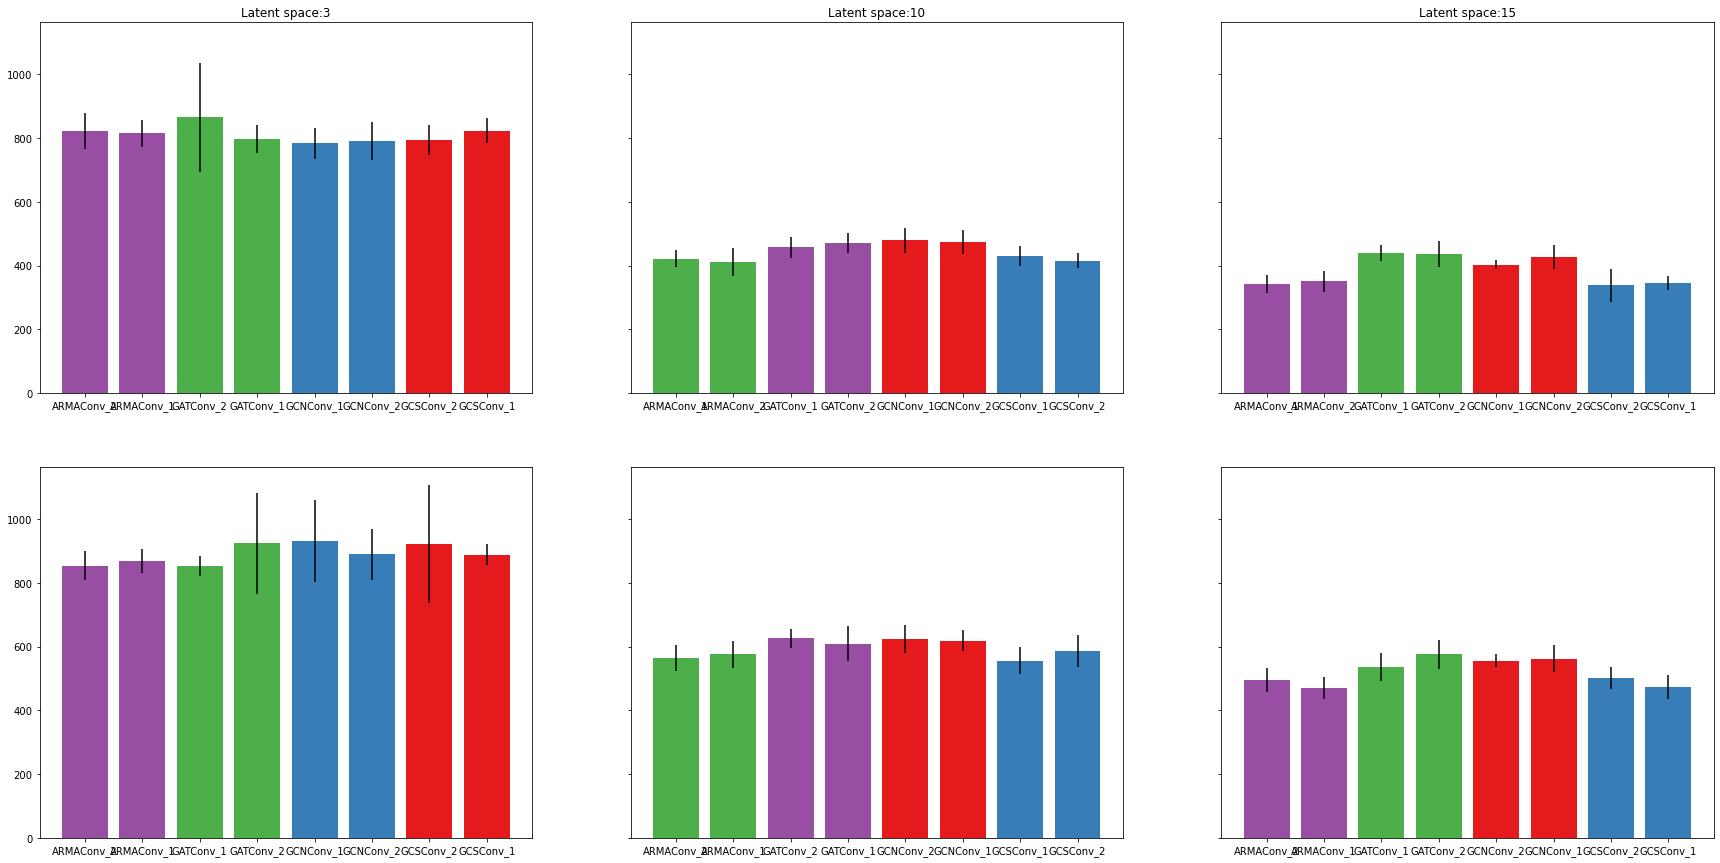

In [12]:

def get_best_for_convtype(df_models):
    convtypes = set(df_models['convtype'])
    ae_types = set(df_models['ae_type'])
    latentdim = sorted([int(i) for i in set(df_models['latentdim'])])
    fig, ax = plt.subplots(2, 3,figsize=(30,15), sharey=True)
    counter = 0
    pc_all = []
    for dim in latentdim:
        print(dim)
        dim_data = df_models.loc[df_models['latentdim']==str(dim)]
        gae_data = dim_data.loc[dim_data['ae_type']=="GAE"].sort_values(by="convtype")
        vgae_data = dim_data.loc[dim_data['ae_type']=="VGAE"].sort_values(by="convtype")
#         a_names= np.arange(len(dim_data['name'])-1)
#         print(a_names)
#         print(list(df_models['mean_loss_test']))
#         colors = {'ARMAConv':'red', 'GATConv':'green', 'GCNConv':'blue', 'GCSConv':'yellow'}
        color_labels = dim_data['convtype'].unique()
        rgb_values = sns.color_palette("Set1", 4)
        color_map = dict(zip(color_labels, rgb_values))
    
        colors2 = ['red','red','green','green','blue','blue','yellow','yellow']
        ax[0][counter].bar(x=gae_data['name'], height=gae_data['mean_loss_test'],yerr=gae_data['std_loss_test'],color=gae_data['convtype'].map(color_map))
        ax[1][counter].bar(x=vgae_data['name'], height=vgae_data['mean_loss_test'],yerr=vgae_data['std_loss_test'],color=vgae_data['convtype'].map(color_map))#vgae_data['ae_type'].map(colors))
        ax[0][counter].title.set_text('Latent space:'+str(dim))

        counter+=1
#         for a_type in ae_types:
#             for ct in convtypes:
#                 print(a_type,ct)
        x1 = list(gae_data['losses_test'])
        x2 = list(vgae_data['losses_test'])
        pc1 = sp.posthoc_nemenyi(x1)
        pc2 = sp.posthoc_nemenyi(x2)
        pc_all.append([pc1,pc2])

        
    plt.savefig("fig_all_base_compairson.pdf")
    return pc_all
    
pc_all = get_best_for_convtype(finall_df)

In [13]:
def gen_bar_plot(fit,r,name="_"):
    labels = np.arange(len(fit[0]))
    fig = plt.figure()                                                               
    ax = fig.gca()  #get current axes
    for f in fit:
        ax.plot(labels, f, 0.1)
#     ax.bar(labels, fit, 0.1, align='center')
    #Remove the default x-axis tick numbers and  
    #use tick numbers of your own choosing:
    ax.set_xticks(labels)
    #Replace the tick numbers with strings:
    ax.set_xticklabels(labels)
    #Remove the default y-axis tick numbers and  
    #use tick numbers of your own choosing:
    # ax.set_yticks(ys)
    plt.savefig('fit_jumps{0}_{1}_{2}.pdf'.format(r[0],r[1],name))

In [14]:
# # c[0]['evaluations'][''].keys()

# path = "/home/adam/thesis/VGAE/experiments/experiment_base/models/No/GAE/numfeatures3/adjsize15/batchsize256/latentdim15/nhidden64/learningrate0.01/convtypeGCSConv/model_enc_2_2_deca1_decx1_2_train_id_9/reflection_0_1.pkl"
# pickle_off = open (path, "rb")
# emp = pickle.load(pickle_off)
# emp[0]

[0, 1]
11
11
11
11
11
11
11
11
11
11
[0, 1]
11
11
11
11
11
11
11
11
11
11
[0, 10]
11
11
11
11
11
11
11
11
11
11
[0, 100]
11
11
11
11
11
11
11
11
11
11
[0, 1000]
11
11
11
11
11
11
11
11
11
11


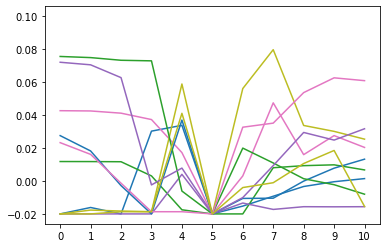

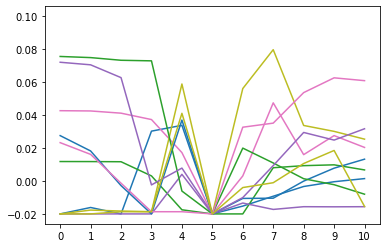

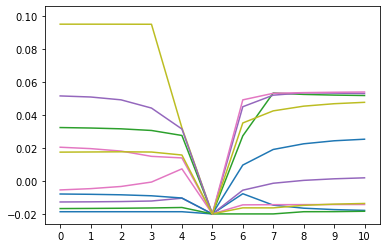

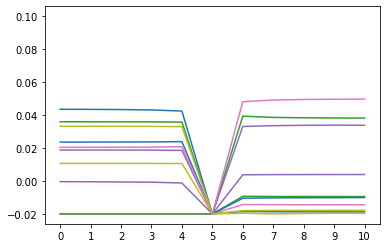

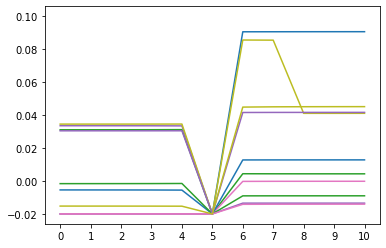

In [15]:
# ranges = [[0,0.00001],[0,0.0001],[0,0.001],[0,0.01],[0,1],[0,1],[0,10],[0,100],[0,1000]]
ranges = [[0,1],[0,1],[0,10],[0,100],[0,1000]]
np.set_printoptions(suppress=True)

for p in finall_df['path_model']:
    p="/home/adam/thesis/VGAE/experiments/experiment_base/models/No/GAE/numfeatures3/adjsize15/batchsize256/latentdim15/nhidden64/learningrate0.01/convtypeGCSConv/model_enc_2_2_deca1_decx1_2_train_id_9"
    for r in ranges:
        print(r)
        path = p+"/reflection_{0}_{1}.pkl".format(r[0],r[1])
#         df_all = pd.read_pickle(path)
        
        pickle_off = open (path, "rb")
        emp = pickle.load(pickle_off)
        fit_all = []
        for ex in range(len(emp)):
            df_all = emp[ex]
            frams_gen,z_all = gen_f0_from_df(df_all)
            gen_correct = []
            z_correct = []
            for i in range(len(frams_gen)):
            #     print(i)
                gen = frams_gen[i]
                z = z_all[i]
#                 print("check_consistency_for_gen")
                gen = FramsManager.check_consistency_for_gen(gen)
                if gen is not None:
#                     print("reduce_joint_length_for_gen")
                    gen = FramsManager.reduce_joint_length_for_gen(gen)
                if gen is not None:
                    gen_correct.append(gen)
                    z_correct.append(z)
            print((len(gen_correct)))
            c = framsLib.evaluate(gen_correct)
            fit = []
            for i in range(len(c)):
                f_val = c[i]['evaluations']['']['vertpos']
#                 print(f_val)
                fit.append(f_val)
            fit_all.append(fit)
        gen_bar_plot(fit_all,r,"all")
        
    break

In [25]:
fit = []

In [26]:
ranges = [[0,0.00001],[0,0.0001],[0,0.001],[0,0.01],[0,1],[0,1],[0,10],[0,100],[0,1000]]

r = ranges[6]
np.set_printoptions(suppress=True)

for p in finall_df['path_model']:
    p="/home/adam/thesis/VGAE/experiments/experiment_base/models/No/GAE/numfeatures3/adjsize15/batchsize256/latentdim15/nhidden64/learningrate0.01/convtypeGCSConv/model_enc_2_2_deca1_decx1_2_train_id_9"
    for r in [[0,1]]:#ranges:
        print(r)
        path = p+"/decoded_{0}_{1}.pkl".format(r[0],r[1])
        df_all = pd.read_pickle(path)
        frams_gen,z_all = gen_f0_from_df(df_all)
        print(df_all['z'])
        gen_correct = []
        z_correct = []
        for i in range(len(frams_gen)):
            if i % 20 ==0:
                print(i)
            gen = frams_gen[i]
            z = z_all[i]
#             print("check_consistency_for_gen")
            gen = FramsManager.check_consistency_for_gen(gen)
            if gen is not None:
#                 print("reduce_joint_length_for_gen")
                gen = FramsManager.reduce_joint_length_for_gen(gen)
            if gen is not None:
                gen_correct.append(gen)
                z_correct.append(z)
        print((len(gen_correct)))
        c = framsLib.evaluate(gen_correct)
        for i in range(len(c)):
            f_val = c[i]['evaluations']['']['vertpos']
            print(f_val)
            fit.append(f_val)
#         gen_bar_plot(fit,r)
#         gen_bar_plot(fit,r)
        break

    break

[0, 1]
0    [0.07332864613521173, 0.016250934057175037, 0....
0    [0.9293801185273507, 0.6184122048608076, 0.140...
0    [0.13054002189094294, 0.7216115462928273, 0.82...
0    [0.4654768793578009, 0.6412859210746507, 0.434...
0    [0.8486780504044998, 0.7694705816459042, 0.666...
                           ...                        
0    [0.37675823143960196, 0.518513669925491, 0.910...
0    [0.6353509094526049, 0.8561408588312258, 0.335...
0    [0.7199841737769029, 0.5883827476464762, 0.469...
0    [0.5892816638832041, 0.9956318528609283, 0.395...
0    [0.07064750464294534, 0.9115461990940842, 0.87...
Name: z, Length: 1000, dtype: object
0
min() arg is an empty sequence
min() arg is an empty sequence
20
min() arg is an empty sequence
40
min() arg is an empty sequence
min() arg is an empty sequence
60
min() arg is an empty sequence
80
min() arg is an empty sequence
min() arg is an empty sequence
min() arg is an empty sequence
min() arg is an empty sequence
min() arg is an empty seque

In [30]:
for i in range(len(c)):
            f_val = c[i]['evaluations']['']['vertpos']
            print(f_val)
            fit.append(f_val)

-0.004569369442543526
0.028166296050627204
-0.018666666663467855
0.01474990369528293
0.021344681042064922
-0.019999999999288788
-0.019999999997052577
0.017128941535400916
0.03430507294368419
0.023105041128903894
0.03434987196266215
-0.018666666666693702
-0.018666666666524563
-0.02000000000089735
0.024827674890312956
-0.01560672092982347
0.03693379606822498
0.047563260392745985
-0.019999999991487577
-0.01280660313714942
-0.002881698674416761
0.02273889713997805
0.017977642930703752
0.10597680749687985
0.0029803145373481043
0.016699640202553545
-0.0012118995857965022
0.044375205018746644
0.0389743980875932
0.0013849637046881628
0.0445214806239983
0.002619758527251286
-0.0195691486775649
0.032041664251900276
0.03440216586467437
-0.011848503617773181
0.04290751634429815
0.053765277132925886
-0.012038178326009164
-0.012950926946149788
-0.010556276910669335
0.03177630320242972
-0.019999999999486782
-0.015285378521025971
0.06735642809173739
-0.0030479821212966796
-0.019999999999563027
-0.0199

In [29]:
for g in gen_correct:
    print(g)

//0
p:1.0, 1.0, 3.801779e-06
p:1.0, 1.0, 0.74043524
p:5.816879e-06, 0.65896, 1.0
p:6.408903e-09, 0.3517128, 0.9999101
p:3.6194655e-07, 2.0830582e-15, 1.2349801e-13
p:1.4378249e-17, 9.238316e-27, 7.45891e-33
p:8.3683334e-22, 3.7357024e-06, 5.1531372e-24
p:1.0325348e-15, 6.6455836e-09, 3.1500062e-21
p:2.7485057e-14, 1.4918312e-17, 6.9876834e-15
p:1.5053828e-07, 7.2413786e-17, 3.4733785e-13
p:3.4936604e-06, 2.332983e-25, 2.2346567e-17
p:2.056681e-20, 8.7342455e-15, 2.0502131e-14
p:6.250014e-09, 1.1448408e-22, 1.1171384e-09
p:8.849508e-24, 1.0867346e-19, 1.4498019e-20
p:2.868532e-06, 2.2919371e-11, 1.5615695e-20
j:0, 1
j:0, 2
j:1, 2
j:3, 2
j:6, 3
j:7, 6
j:11, 7
j:13, 11
j:5, 13
j:8, 5
j:12, 8
j:9, 12
j:4, 9
j:14, 4
j:10, 14

//0
p:1.0, 0.9891059, 2.9046685e-05
p:0.9903591, 1.0, 0.14741133
p:3.154078e-05, 0.13668324, 1.0
p:0.00042992586, 0.006989533, 0.0009474349
p:7.742273e-12, 2.3083443e-08, 3.2720297e-07
p:1.1736557e-06, 1.3228809e-15, 4.3320916e-20
p:2.138852e-15, 0.9448854, 1.542884e-1

In [27]:
fit

[-0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442543526,
 -0.004569369442

11


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10')]

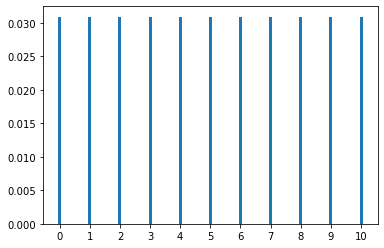

In [68]:
# pc = pc_all[2]
# pc1,pc2 =pc
# heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
# sp.sign_plot(pc1, **heatmap_args)

In [69]:
# sp.sign_plot(pc2, **heatmap_args)

In [70]:
set(finall_df['convtype'])

{'ARMAConv', 'GATConv', 'GCNConv', 'GCSConv'}

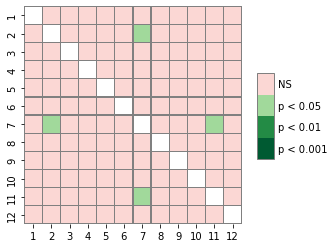

In [55]:
x = list(finall_df.loc[finall_df['convtype']=='GCSConv']['losses_train'])
pc = sp.posthoc_nemenyi(x)
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.savefig("fig.pdf")

In [53]:
pc

,1,2,3,4,5,6,7,8,9,10,11,12
1,1.000000,0.982351,0.979176,0.996776,1.000000,0.676631,1.000000,0.757354,0.984692,0.902500,0.700158,0.999420
2,0.982351,1.000000,1.000000,0.393862,0.982841,0.999933,0.999361,0.999988,0.246710,0.085447,0.021985,1.000000
3,0.979176,1.000000,1.000000,0.373361,0.979735,0.999955,0.999154,0.999993,0.230513,0.077852,0.019545,1.000000
4,0.996776,0.393862,0.373361,1.000000,0.996652,0.050024,0.953997,0.075442,1.000000,0.999994,0.999229,0.719789
5,1.000000,0.982841,0.979735,0.996652,1.000000,0.680030,1.000000,0.760374,0.984245,0.900718,0.696837,0.999447
6,0.676631,0.999933,0.999955,0.050024,0.680030,1.000000,0.911089,1.000000,0.021144,0.003750,0.000507,0.994820
7,1.000000,0.999361,0.999154,0.953997,1.000000,0.911089,1.000000,0.946294,0.883697,0.659459,0.380150,0.999999
8,0.757354,0.999988,0.999993,0.075442,0.760374,1.000000,0.946294,1.000000,0.033913,0.006670,0.000995,0.997988
9,0.984692,0.246710,0.230513,1.000000,0.984245,0.021144,0.883697,0.033913,1.000000,1.000000,0.999941,0.555732
10,0.902500,0.085447,0.077852,0.999994,0.900718,0.003750,0.659459,0.006670,1.000000,1.000000,1.000000,0.281018
